(555719, 23)
First 5 lines:
   Unnamed: 0 trans_date_trans_time        cc_num  \
0           0      21-06-2020 12:14  2.291160e+15   
1           1      21-06-2020 12:14  3.573030e+15   
2           2      21-06-2020 12:14  3.598220e+15   
3           3      21-06-2020 12:15  3.591920e+15   
4           4      21-06-2020 12:15  3.526830e+15   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3

C:\Users\bhargava gajula\AppData\Local\Temp\ipykernel_9144\4293912068.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['is_fraud'] == 1, col], bins=50, color='r')
C:\Users\bhargava gajula\AppData\Local\Temp\ipykernel_9144\4293912068.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

ValueError: could not convert string to float: '21-06-2020 22:06'

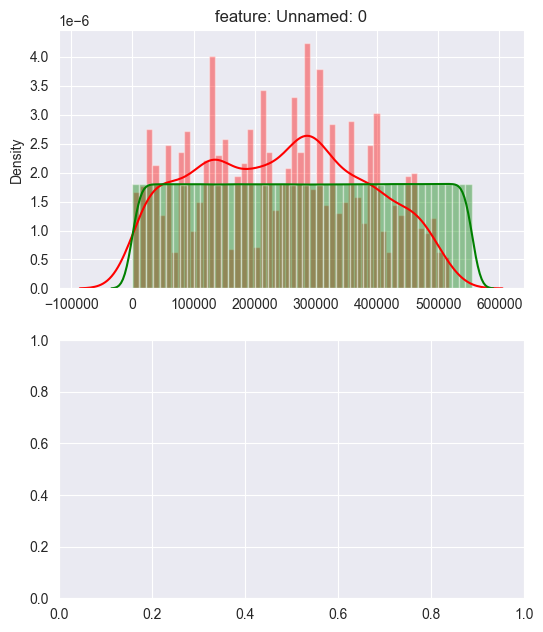

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Load your dataset
df = pd.read_csv("E:/datasets/fraudTest.csv")

print(df.shape)
print("First 5 lines:")
print(df.head(5))
print("describe:")
print(df.describe())
print("info:")
print(df.info())

# Standardize the 'amt' column and drop it
df['scaled_Amount'] = StandardScaler().fit_transform(df['amt'].values.reshape(-1, 1))
df = df.drop(['amt'], axis=1)

# Ensure that the 'is_fraud' column contains binary labels (0 or 1)
df['is_fraud'] = df['is_fraud'].astype(int)

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6, 28 * 4))
for i, col in enumerate(df[df.iloc[:, 0:28].columns]):
    ax5 = plt.subplot(gs[i])
    if col != 'is_fraud':  # Exclude the target column
        sns.distplot(df.loc[df['is_fraud'] == 1, col], bins=50, color='r')
        sns.distplot(df.loc[df['is_fraud'] == 0, col], bins=50, color='g')
        ax5.set_xlabel('')
        ax5.set_title('feature: ' + str(col))
plt.show()

# Continue with the rest of your code

def split_data(df, drop_list):
    df = df.drop(drop_list, axis=1)
    print(df.columns)

    # Test-train split
    from sklearn.model_selection import train_test_split
    y = df['is_fraud'].values
    X = df.drop(['is_fraud'], axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("Train-set size: ", len(y_train), "\nTest-set size: ", len(y_test))
    print("Fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

def get_predictions(clf, X_train, y_train, X_test):
    clf = clf
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)
    train_pred = clf.predict(X_train)
    print('Train-set confusion matrix:\n', confusion_matrix(y_train, train_pred))
    return y_pred, y_pred_prob

def print_scores(y_test, y_pred, y_pred_prob):
    print('Test-set confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print("Recall score: ", recall_score(y_test, y_pred))
    print("Precision score: ", precision_score(y_test, y_pred))
    print("F1 score: ", f1_score(y_test, y_pred))
    print("Accuracy score: ", accuracy_score(y_test, y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:, 1])))

drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test, y_pred, y_pred_prob)

drop_list = ['V28', 'V27', 'V26', 'V25', 'V24', 'V23', 'V22', 'V20', 'V15', 'V13', 'V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test, y_pred, y_pred_prob)

drop_list = ['Time_Hr', 'V28', 'V27', 'V26', 'V25', 'V24', 'V23', 'V22', 'V20', 'V15', 'V13', 'V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test, y_pred, y_pred_prob)

drop_list = ['scaled_Amount', 'Time_Hr', 'V28', 'V27', 'V26', 'V25', 'V24', 'V23', 'V22', 'V20', 'V15', 'V13', 'V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test, y_pred, y_pred_prob)

df = df.drop(drop_list, axis=1)
print(df.columns)

y_pred, y_pred_prob = get_predictions(LogisticRegression(C=0.01, penalty='l1'), X_train, y_train, X_test)
print_scores(y_test, y_pred, y_pred_prob)
